In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A 2D progression using modular arithmetic

The epidemics project uses a probabilistic rule to update the state of the population from one day to the next.  We will see that process play out over time by observing an animation.  Today we will experiment with something similar to aid in writing the code for the project.

Deterministic rule:  instead of using a probabilistic rule to update the array, we will use a deterministic one.

$$ arr[i,j] = \left(\sum_{k=i-1}^{i+1}\sum_{l=j-1}^{j+1} arr[k,l]\right) \mod 3 $$

This rule updates the array by replacing the $(i,j)$ entry with the number you get when you sum up the surrounding entries and then mod by 3.

### Starting configuration

Lets begin with an $ n\times n $ array of all zeros with a small block (3$\times$3) of ones in the middle.  

**Exercise:**  Write a function that does this.

In [2]:
def StartingState(size):
    arr = np.zeros((size,size),dtype=int)
    arr[size//2 - 1 : size//2 + 2 , size//2 - 1 : size//2 + 2] = np.ones((3,3),dtype=int)
    return arr

In [3]:
init_state = StartingState(15)
print(init_state)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### Adding up the neighbors

In order to update our array from one state to the next, we need to be able to add up the entries in a neighborhood of the $(i,j)$ entry for any choice of $ i,j $.  Let's write a function to do that for us.

**Exercise:** Given an array and a choice of $ (i,j) $ entry, how could we access the surrounding entries?  Does this work for all possible choices of $ (i,j) $?

If $ (i,j) $ lies on the edge of the array, we could run into problems.

In [4]:
init_state[13:16,3:6]

array([[0, 0, 0],
       [0, 0, 0]])

In [5]:
init_state[-1:2,3:6]

array([], shape=(0, 3), dtype=int32)

When we slice the array on the left or the top edge, we end up with an empty slice due to the negative index.  We can solve this problem by adding a border to our array.  If we do this, what happens to the indices in our slice?

Now that we have fixed the issue with empty slices, we can use the function `np.sum` to add up the entries in our slice.

**Exercise:** Write a function that adds up the entries in the neighborhood of a given entry.

In [6]:
def SumOfNeighbors(arr,i,j):
    m,n = np.shape(arr)
    border_arr = np.zeros((m+2,n+2),dtype=int)
    border_arr[1 : m+1 , 1 : n+1] = arr
    neighborhood = border_arr[i : i+3 , j : j+3]
    return np.sum(neighborhood)

In [7]:
SumOfNeighbors(init_state,9,7)

3

### Updating the array

We can now update the array according to the rule.  We have to update every entry of the array, so we will need to loop through all the entries.

**Exercise:** Write a for loop to loop through all of the entries of the array.  *Hint: Use `np.shape` to get the dimensions of the array.*

**Exercise:** Inside the loop, update the current entry with the sum of its neighborhood mod 3, use the function you just wrote to get the sum.

**Exercise:** Turn this into a function taking the array as input and returning the updated array.

There is a subtle issue we will run into if we are not careful with our code.  As we are looping though the array, updating the entries as we go, we are throwing off the neighborhood sum of the next entry because the entry we just updated will be included in that neighborhood sum.  To avoid this, we can use `np.copy` to create a copy of our array that we can update and change without influencing the neighborhood sums.

In [8]:
def UpdateState(arr):
    m,n = np.shape(arr)
    updated_arr = np.copy(arr)
    for i,j in [(i,j) for i in range(m) for j in range(n)]:
        neighborhood_sum = SumOfNeighbors(arr,i,j)
        updated_arr[i,j] = neighborhood_sum%3
    return updated_arr

In [9]:
UpdateState(init_state)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### A comment about efficiency

In our function `SumOfNeighbors`, we are broadcasting the array into an bordered array, so every time we call this function, we are essentially copying the entire array.  It would be much more efficient if we only created the bordered array once instead of every time we call `SumOfNeighbors`.  How could we do this?

In [10]:
def SumOfNeighbors(border_arr,i,j):
    neighborhood = border_arr[i : i+3 , j : j+3]
    return np.sum(neighborhood)

In [11]:
def UpdateState(arr):
    m,n = np.shape(arr)
    updated_arr = np.copy(arr)
    border_arr = np.zeros((m+2,n+2),dtype=int)
    border_arr[1 : m+1 , 1 : n+1] = arr
    for i,j in [(i,j) for i in range(m) for j in range(n)]:
        neighborhood_sum = SumOfNeighbors(border_arr,i,j)
        updated_arr[i,j] = neighborhood_sum%3
    return updated_arr

### Now we animate

From the code provided, the first 9 lines only need to be run once, so we can separate them into their own cell.  We can also delete line 5 since we have already imported NumPy.

In [12]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

Of the remaining lines of code, we only need to modify line 1, line 5, and line 13.  If you want to change the colors or use a different color map, you may need to modify lines 6 and 7.

<IPython.core.display.Javascript object>


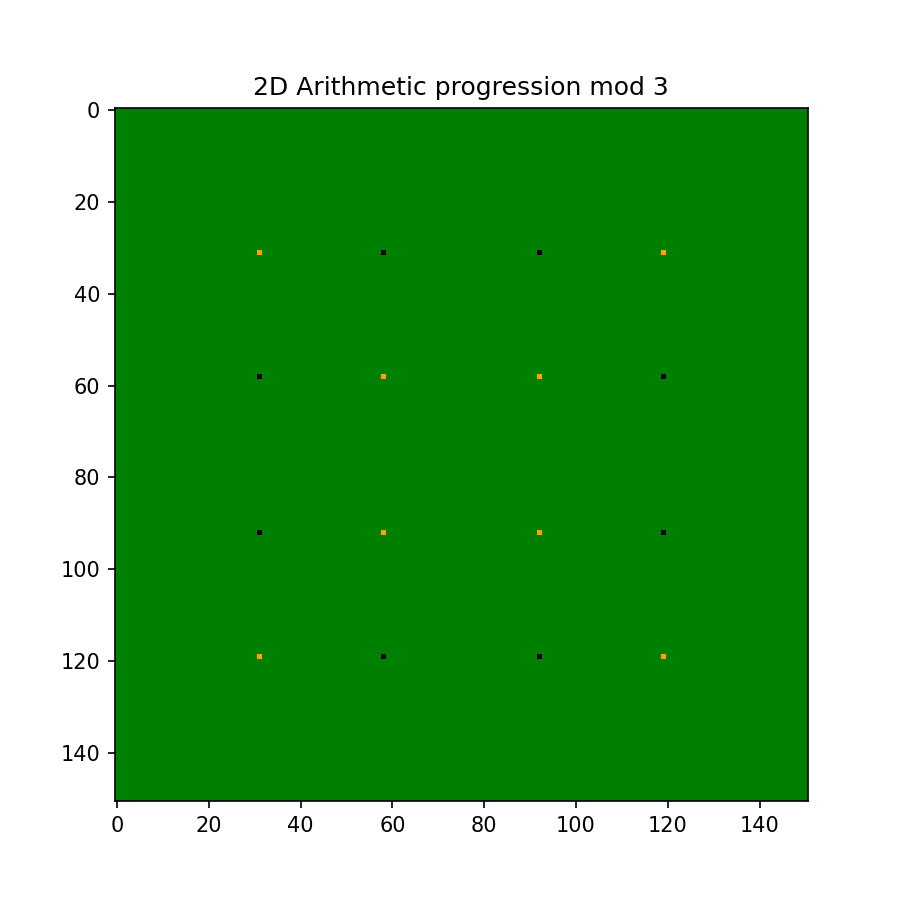

In [13]:
x = StartingState(151)

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("2D Arithmetic progression mod 3")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=UpdateState(x)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=500, blit=True, repeat=False)
plt.show()

### Using `np.roll`

This function will shift an array in along a given axis.  The arguments are
* an array
* an amount to be shifted
* the axis along which to shift

*You may want to restart your kernel before continuing*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

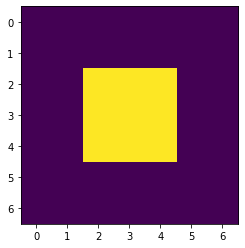

In [2]:
def StartingState(size):
    arr = np.zeros((size,size),dtype=int)
    arr[size//2 - 1 : size//2 + 2 , size//2 - 1 : size//2 + 2] = np.ones((3,3),dtype=int)
    return arr

arr = StartingState(7)
plt.imshow(arr)
plt.show()

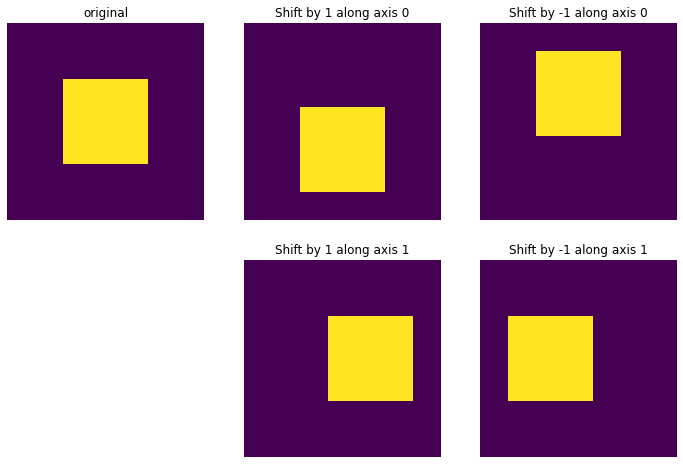

In [3]:
arr1 = np.roll(arr,1,0)
arr2 = np.roll(arr,-1,0)
arr3 = np.roll(arr,1,1)
arr4 = np.roll(arr,-1,1)
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(arr)
plt.title('original')
plt.axis('off')
plt.subplot(232)
plt.imshow(arr1)
plt.title('Shift by 1 along axis 0')
plt.axis('off')
plt.subplot(233)
plt.imshow(arr2)
plt.title('Shift by -1 along axis 0')
plt.axis('off')
plt.subplot(235)
plt.imshow(arr3)
plt.title('Shift by 1 along axis 1')
plt.axis('off')
plt.subplot(236)
plt.imshow(arr4)
plt.title('Shift by -1 along axis 1')
plt.axis('off')
plt.show()

We can also shift diagonally by using tuples for the shift and axis.  This will essentially shift twice, the first shift uses the 0 index from the shift and axis tuples, and the second shift uses the 1 index.

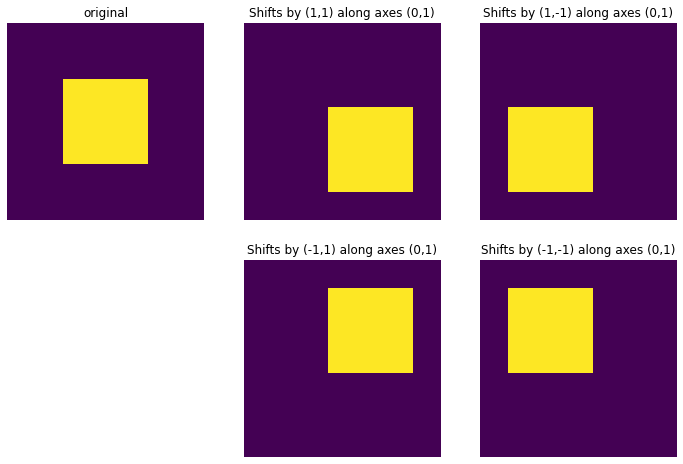

In [4]:
arr5 = np.roll(arr,(1,1),(0,1))
arr6 = np.roll(arr,(1,-1),(0,1))
arr7 = np.roll(arr,(-1,1),(0,1))
arr8 = np.roll(arr,(-1,-1),(0,1))
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(arr)
plt.title('original')
plt.axis('off')
plt.subplot(232)
plt.imshow(arr5)
plt.title('Shifts by (1,1) along axes (0,1)')
plt.axis('off')
plt.subplot(233)
plt.imshow(arr6)
plt.title('Shifts by (1,-1) along axes (0,1)')
plt.axis('off')
plt.subplot(235)
plt.imshow(arr7)
plt.title('Shifts by (-1,1) along axes (0,1)')
plt.axis('off')
plt.subplot(236)
plt.imshow(arr8)
plt.title('Shifts by (-1,-1) along axes (0,1)')
plt.axis('off')
plt.show()

We can now put all these shifts together into a single line of code.

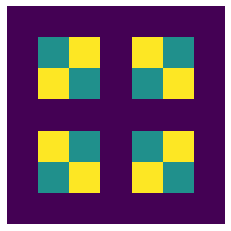

In [5]:
updated_arr = sum([np.roll(arr,(i,j),(0,1)) for i in range(-1,2) for j in range(-1,2)])%3
plt.imshow(updated_arr)
plt.axis('off')
plt.show()

This essentially allows us to combine the `SumOfNeighbors` and `UpdateState` functions into a single function that does both at the same time and much more efficiently.  No more big long for loop!

In [6]:
def UpdateState2(arr):
    m,n = np.shape(arr)
    # Put a border of 0s around the array
    border_arr = np.zeros((m+2,n+2),dtype=int)  
    border_arr[1 : m+1 , 1 : n+1] = arr
    # Compute all the neighborhood sums AT THE SAME TIME, no big for loop.
    updated_arr = sum([np.roll(border_arr,(i,j),(0,1)) for i in range(-1,2) for j in range(-1,2)])%3
    # Return the updated array without the border
    return updated_arr[1 : m+1 , 1 : n+1] 

<IPython.core.display.Javascript object>


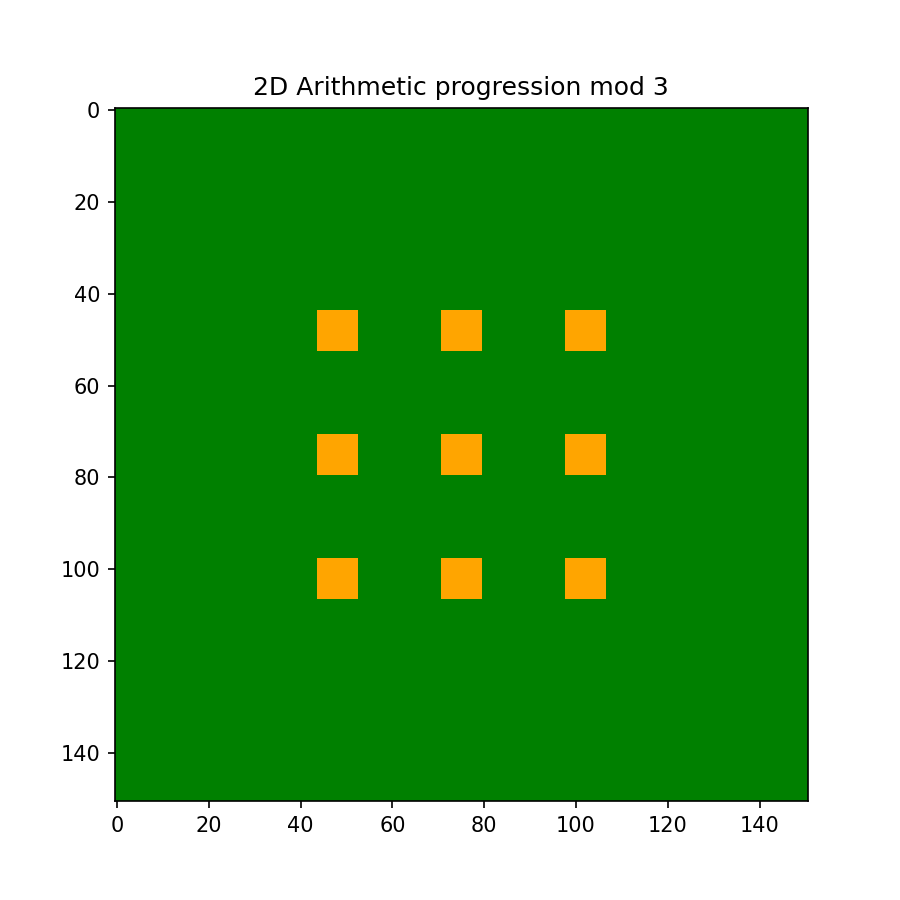

In [7]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = StartingState(151)

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("2D Arithmetic progression mod 3")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=UpdateState2(x)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()